In [1]:
import cv2
import numpy as np
import scipy.fftpack as fp
from scipy import signal
from matplotlib import pyplot as plt

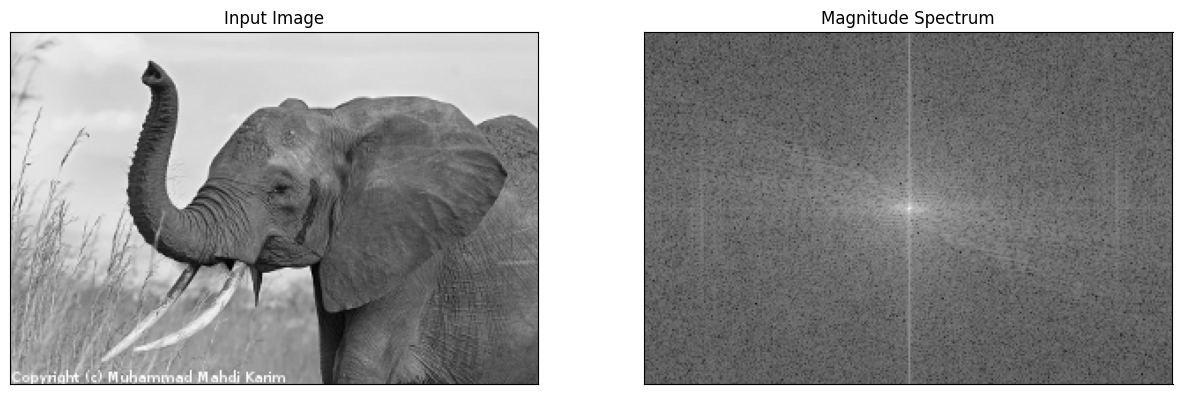

In [2]:
img = plt.imread('/home/santa/Desktop/lab/lab_6/elephant.png')

# Convert RGB image to GrayScale image 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Take Fourier at the input image
dft = cv2.dft(np.float32(img_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_spectrum = 20*np.log(0.01 + cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
# Show Fourier Spectrum of Input Image
plt.subplot(221)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# Show Fourier Spectrum of Input Image
plt.subplot(222)
plt.imshow( dft_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

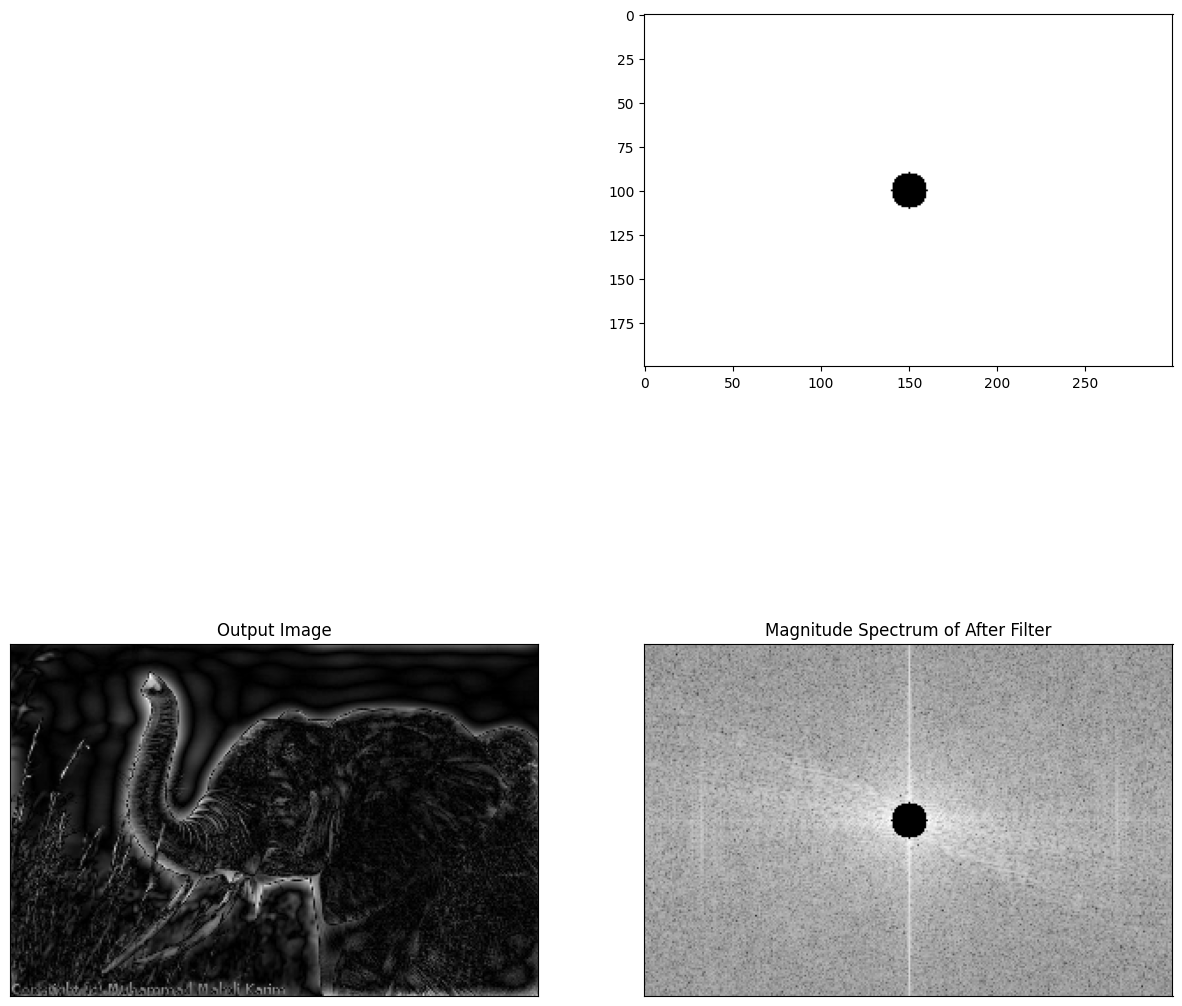

In [3]:
# Fourier part =============================>
rows, cols = img_gray.shape
crow, ccol = rows/2 , cols/2

# Create Mask
mask = np.zeros((rows, cols, 2), np.uint8)
r = 10 # Smaller than ORIGINAL
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
mask = 1 - mask ##<==========================

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter
plt.figure(figsize=(15,15))
plt.subplot(222)
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

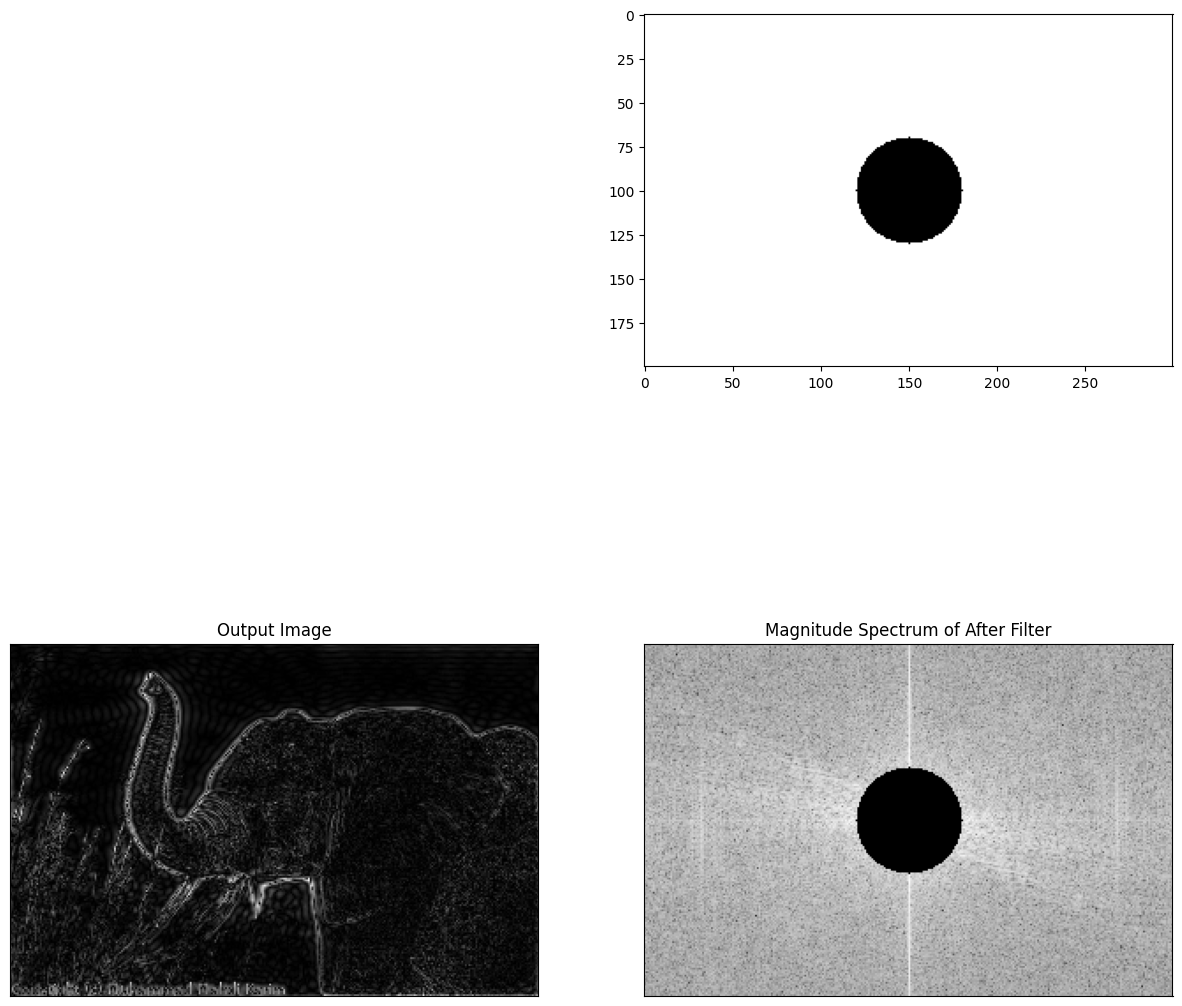

In [4]:
# Fourier part =============================>
rows, cols = img_gray.shape
crow, ccol = rows/2 , cols/2

# Create Mask
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30 #<=================================
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
mask = 1 - mask ##<==========================

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter
plt.figure(figsize=(15,15))
plt.subplot(222)
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

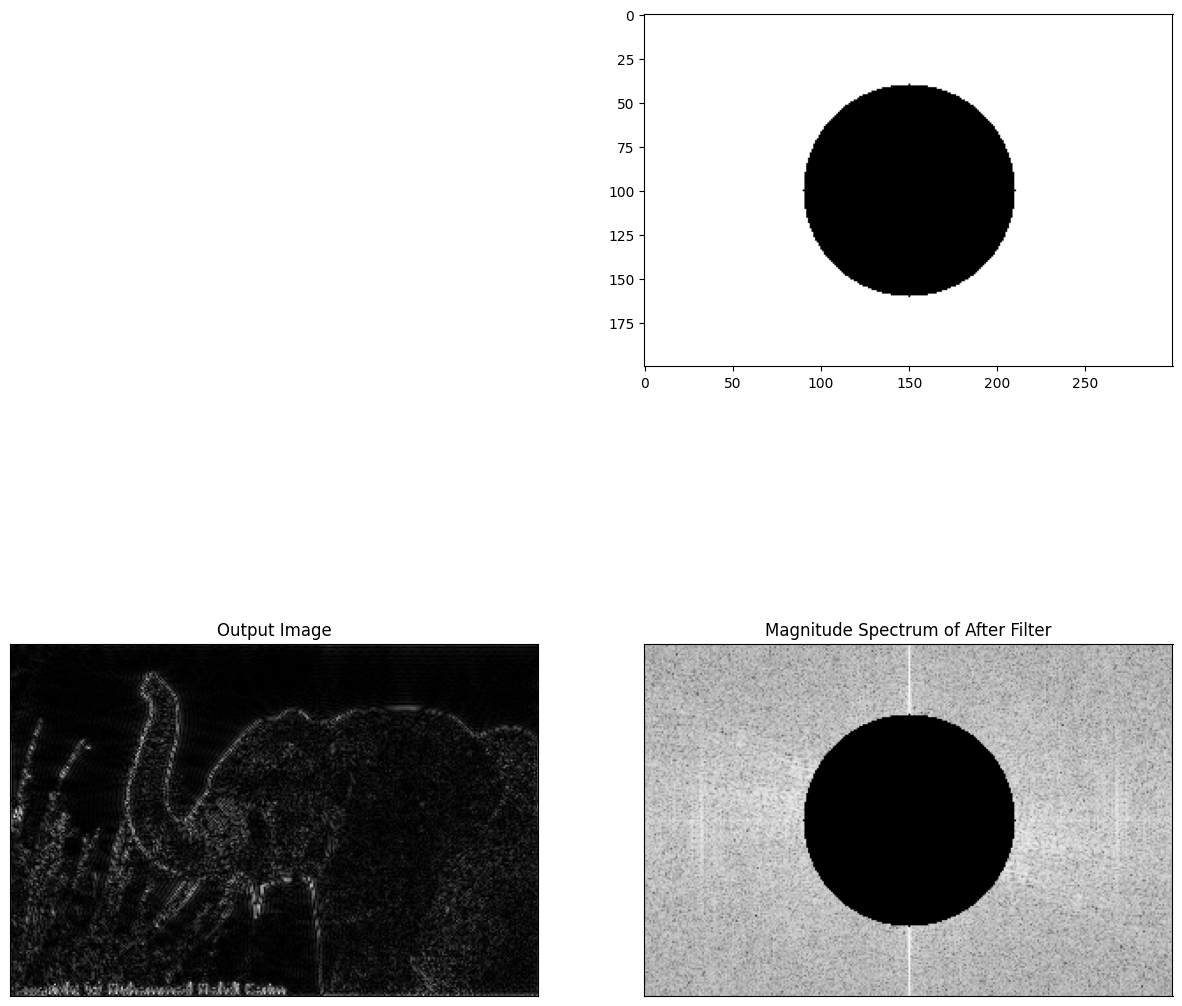

In [5]:
# Fourier part =============================>
rows, cols = img_gray.shape
crow, ccol = rows/2 , cols/2

# Create Mask
mask = np.zeros((rows, cols, 2), np.uint8)
r = 60 #<=================================
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
mask = 1 - mask ##<==========================

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter 
plt.figure(figsize=(15,15))
plt.subplot(222)
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
from scipy.signal.windows import gaussian

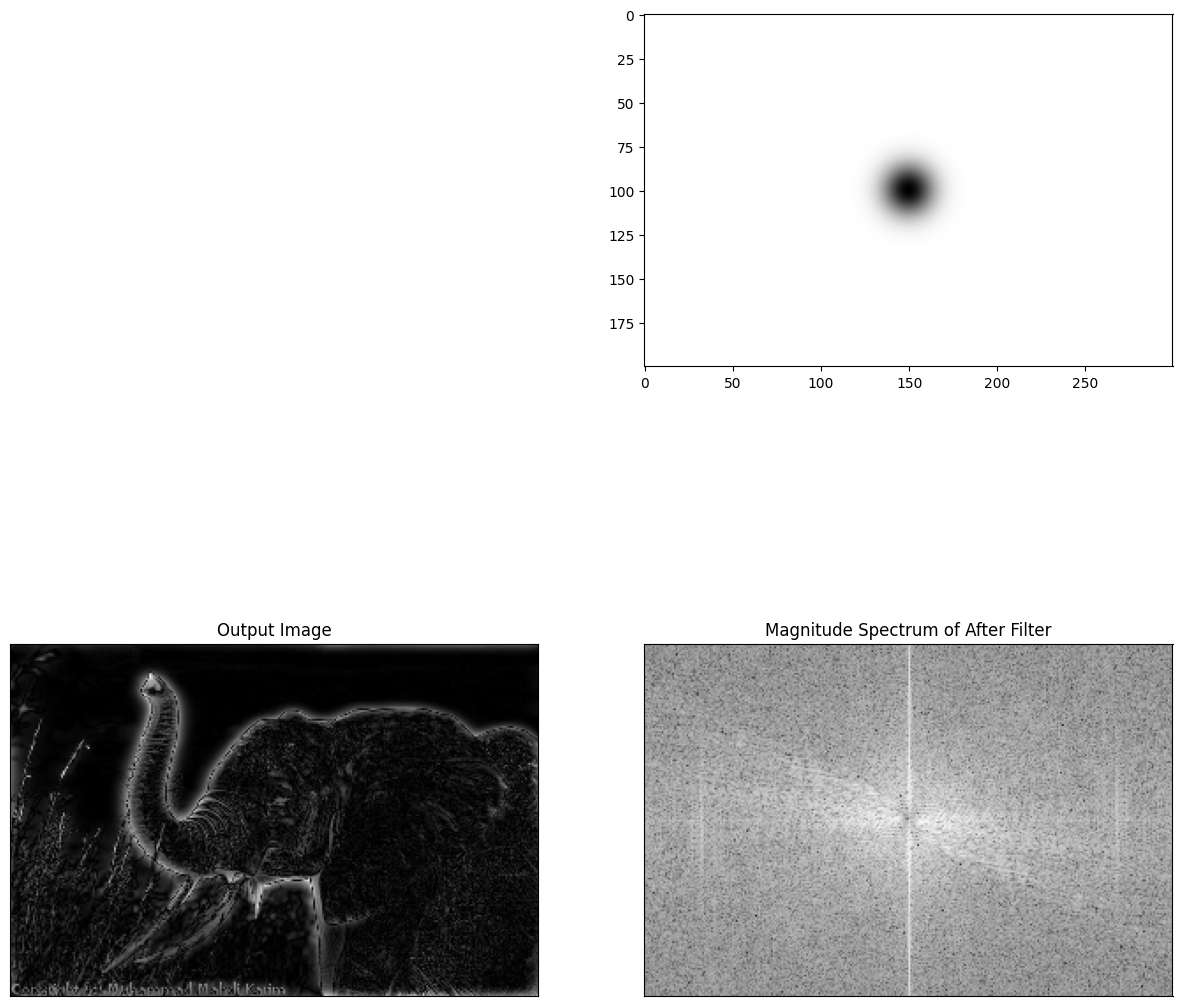

In [8]:
# ==> MAKE Gaussian filter
sigma = 10
kernel = np.outer(gaussian(img_gray.shape[0], sigma), 
                 gaussian(img_gray.shape[1], sigma))
kernel = 1 - kernel ##<==========================
mask = np.repeat(kernel[:, :, np.newaxis], 2, axis=2)

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_back = cv2.dft(np.float32(img_back),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
# dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(dft_shift_back[:,:,0],dft_shift_back[:,:,1]))
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter
plt.figure(figsize=(15,15))
plt.subplot(222)
# plt.imshow(kernel, cmap = 'gray')
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

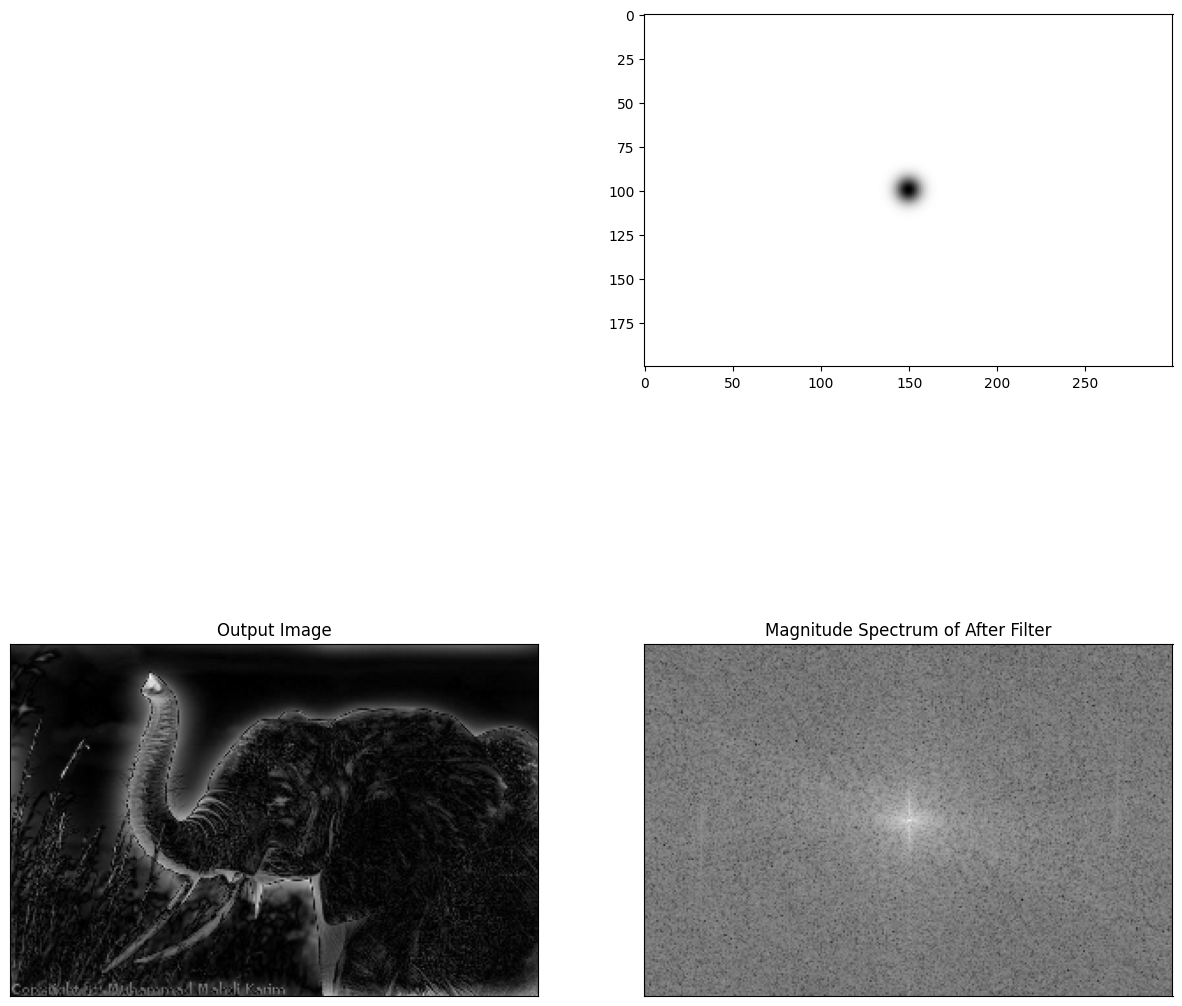

In [9]:
# ==> MAKE Gaussian filter
sigma = 5
kernel = np.outer(gaussian(img_gray.shape[0], sigma), 
                  gaussian(img_gray.shape[1], sigma))
kernel = 1 - kernel ##<==========================
mask = np.repeat(kernel[:, :, np.newaxis], 2, axis=2)

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_back = cv2.dft(np.float32(img_back),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(dft_shift_back[:,:,0],dft_shift_back[:,:,1]))
# dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter
plt.figure(figsize=(15,15))
plt.subplot(222)
# plt.imshow(kernel, cmap = 'gray')
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

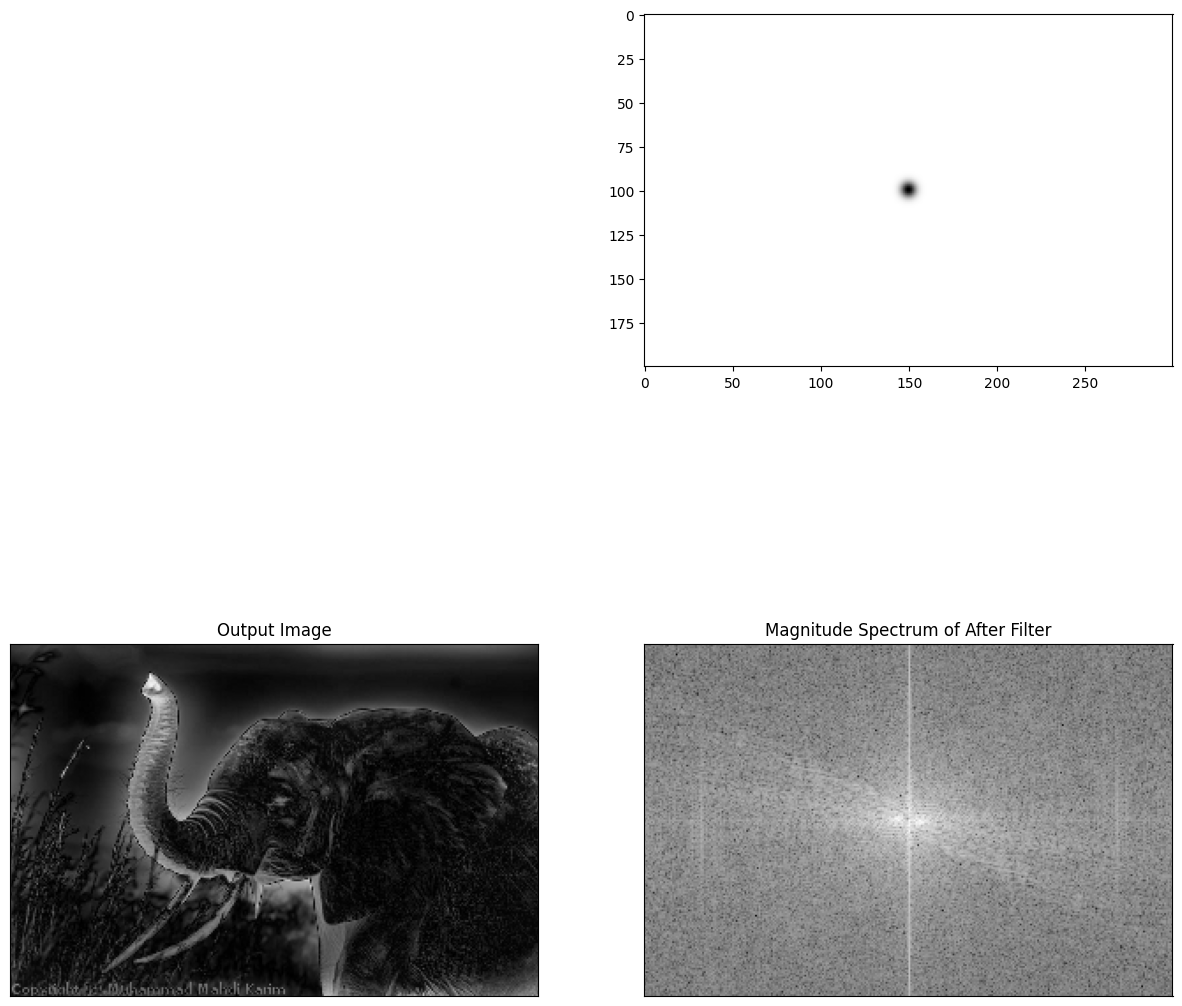

In [10]:
# ==> MAKE Gaussian filter
sigma = 3
kernel = np.outer(gaussian(img_gray.shape[0], sigma), 
                  gaussian(img_gray.shape[1], sigma))
kernel = 1 - kernel ##<==========================
mask = np.repeat(kernel[:, :, np.newaxis], 2, axis=2)

# Apply mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Take Fourier at the input image
dft_back = cv2.dft(np.float32(img_back),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
# dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(dft_shift_back[:,:,0],dft_shift_back[:,:,1]))
dft_magnitude_out = 20*np.log(0.01 + cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

## ============================= SHOW ============================ ##
# Show Mask to filter
plt.figure(figsize=(15,15))
plt.subplot(222)
# plt.imshow(kernel, cmap = 'gray')
plt.imshow(mask[:,:,0], cmap = 'gray')

# Show Fourier Spectrum of Output Image
plt.subplot(224)
plt.imshow(dft_magnitude_out, cmap = 'gray')
plt.title('Magnitude Spectrum of After Filter'), plt.xticks([]), plt.yticks([])

# Show Output
plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()